In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
df = pd.read_csv('aqi.csv')

In [5]:
df.head()

,Year,Month,Day,T,TM,Tm,H,PP,VV,V,VM,RA,TS,FG,pm10,no2,so2,co,AQI
0,2016,1,2,20.8,28.3,12.9,45,0.0,6.3,1.1,5.4,0,0,0,79,60,9,15,79
1,2016,1,3,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,79,45,10,13,79
2,2016,1,4,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,72,45,11,13,72
3,2016,1,5,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,76,42,14,11,76
4,2016,1,6,21.4,29.0,13.7,45,0.0,6.3,0.4,3.5,0,0,0,65,25,26,6,65


In [6]:

# 2. Create a proper DateTime column from Year, Month, Day
df['date'] = pd.to_datetime(df[['Year','Month','Day']])

# 3. Create a day_of_week column from this date
df['day_of_week'] = df['date'].dt.day_name()

# 4. Inspect the result
print(df.head(10))

   Year  Month  Day     T    TM    Tm   H   PP   VV    V  ...  RA  TS  FG  \
0  2016      1    2  20.8  28.3  12.9  45  0.0  6.3  1.1  ...   0   0   0   
1  2016      1    3  21.4  29.0  13.7  45  0.0  6.3  0.4  ...   0   0   0   
2  2016      1    4  21.4  29.0  13.7  45  0.0  6.3  0.4  ...   0   0   0   
3  2016      1    5  21.4  29.0  13.7  45  0.0  6.3  0.4  ...   0   0   0   
4  2016      1    6  21.4  29.0  13.7  45  0.0  6.3  0.4  ...   0   0   0   
5  2016      1    7  21.0  28.7  17.0  65  0.0  6.3  3.1  ...   0   0   0   
6  2016      1    8  20.4  27.6  16.2  61  0.0  5.5  1.3  ...   0   0   0   
7  2016      1    9  20.7  28.4  15.1  47  0.0  6.3  0.9  ...   0   0   0   
8  2016      1   10  20.7  28.4  15.1  47  0.0  6.3  0.9  ...   0   0   0   
9  2016      1   11  20.7  28.4  15.1  47  0.0  6.3  0.9  ...   0   0   0   

   pm10  no2  so2  co  AQI       date day_of_week  
0    79   60    9  15   79 2016-01-02    Saturday  
1    79   45   10  13   79 2016-01-03      Sunda

In [7]:
df.head()

,Year,Month,Day,T,TM,Tm,H,PP,VV,V,...,RA,TS,FG,pm10,no2,so2,co,AQI,date,day_of_week
0,2016,1,2,20.8,28.3,12.9,45,0.0,6.3,1.1,...,0,0,0,79,60,9,15,79,2016-01-02,Saturday
1,2016,1,3,21.4,29.0,13.7,45,0.0,6.3,0.4,...,0,0,0,79,45,10,13,79,2016-01-03,Sunday
2,2016,1,4,21.4,29.0,13.7,45,0.0,6.3,0.4,...,0,0,0,72,45,11,13,72,2016-01-04,Monday
3,2016,1,5,21.4,29.0,13.7,45,0.0,6.3,0.4,...,0,0,0,76,42,14,11,76,2016-01-05,Tuesday
4,2016,1,6,21.4,29.0,13.7,45,0.0,6.3,0.4,...,0,0,0,65,25,26,6,65,2016-01-06,Wednesday


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2726 entries, 0 to 2725
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         2726 non-null   int64         
 1   Month        2726 non-null   int64         
 2   Day          2726 non-null   int64         
 3   T            2726 non-null   float64       
 4   TM           2726 non-null   float64       
 5   Tm           2726 non-null   float64       
 6   H            2726 non-null   int64         
 7   PP           2726 non-null   float64       
 8   VV           2726 non-null   float64       
 9   V            2726 non-null   float64       
 10  VM           2726 non-null   float64       
 11  RA           2726 non-null   int64         
 12  TS           2726 non-null   int64         
 13  FG           2726 non-null   int64         
 14  pm10         2726 non-null   int64         
 15  no2          2726 non-null   int64         
 16  so2   

In [10]:
weekday_stats = df.groupby("day_of_week")[["AQI", "pm10"]].agg(["mean","median","min","max","std"])
weekday_stats

AQI                                  pm10                  \
                  mean median min  max        std       mean median min  max   
day_of_week                                                                    
Friday       72.093199   66.0  10  649  45.209489  71.826196   65.0  10  649   
Monday       68.786802   65.0  17  200  24.314421  68.159898   65.0  17  188   
Saturday     70.398396   65.0  10  649  39.660342  70.122995   64.5  10  649   
Sunday       68.742706   64.0  10  649  39.972665  68.416446   64.0   7  649   
Thursday     67.623116   64.0  12  168  22.820373  67.190955   64.0   9  162   
Tuesday      69.017722   64.0  14  284  28.102734  68.810127   64.0   9  284   
Wednesday    68.565217   65.0  16  189  23.833078  68.434783   65.0   9  189   

                        
                   std  
day_of_week             
Friday       45.296359  
Monday       23.362773  
Saturday     39.690841  
Sunday       39.984359  
Thursday     22.444642  
Tuesday      28.090082  
Wednesday    23.997440

c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

Predicted AQI for 2025-12-31: 69.93929904244891


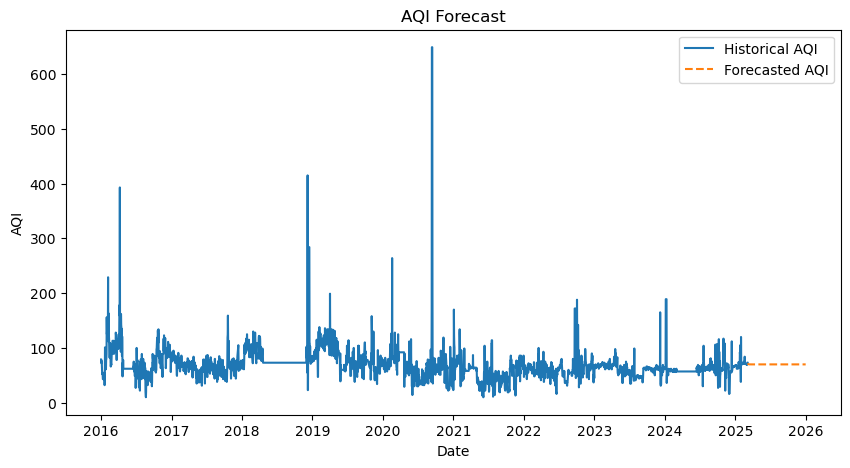

In [11]:
from statsmodels.tsa.arima.model import ARIMA
df['date'] = pd.to_datetime(df[['Year','Month','Day']])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# 3. Fit an ARIMA model on the AQI column.
# Note: The (1,1,1) order is chosen as an example.
model = ARIMA(df['AQI'], order=(1,1,1))
model_fit = model.fit()

# 4. Define a function to predict AQI for a given date.
def predict_aqi_for_date(target_date_str):
    """
    Predicts the AQI for a given target date (in 'YYYY-MM-DD' format).
    
    Parameters:
        target_date_str (str): The target date as a string.
        
    Returns:
        The predicted AQI if the target date is in the future, or an error message.
    """
    target_date = pd.to_datetime(target_date_str)
    last_date = df.index.max()
    
    # Calculate the number of days ahead the target date is from the last date in the dataset.
    days_ahead = (target_date - last_date).days
    
    if days_ahead <= 0:
        return "Target date must be after the last date in the dataset: " + str(last_date.date())
    
    # Forecast the AQI for the required number of days.
    forecast = model_fit.forecast(steps=days_ahead)
    predicted_aqi = forecast.iloc[-1]
    
    return predicted_aqi

# 5. Example usage:
user_input_date = "2025-12-31"  # Replace with the user-specified date
prediction = predict_aqi_for_date(user_input_date)
print(f"Predicted AQI for {user_input_date}: {prediction}")

# (Optional) Plotting the forecast along with historical data
# Let's forecast from the day after the last date until the target date.
forecast_values = model_fit.forecast(steps=(pd.to_datetime(user_input_date) - df.index.max()).days)
forecast_index = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), 
                               periods=len(forecast_values), freq='D')

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['AQI'], label='Historical AQI')
plt.plot(forecast_index, forecast_values, label='Forecasted AQI', linestyle='--')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Forecast')
plt.legend()
plt.show()

c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

Predictions for 2025-12-31:
AQI: 69.93929904244891
pm10: 70.92758762086265
T: 26.138529379798236
TM: 32.57087293130561
Tm: 19.989466444336948
H: 52.94165384176081
PP: 4.151738434813332
VV: 6.918552405375949
V: 4.375929087920617
VM: 6.6494509456990345
RA: 1.0
TS: 1.0
FG: 0.0


c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


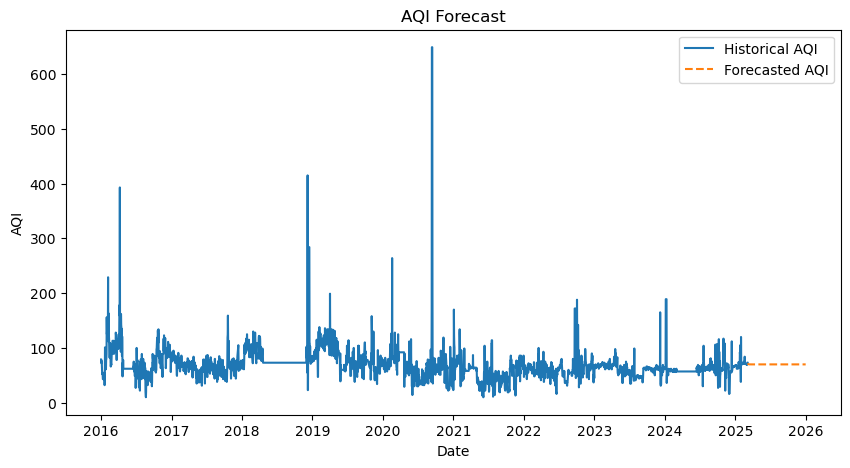

In [12]:
features = ['AQI', 'pm10', 'T', 'TM', 'Tm', 'H', 'PP', 'VV', 'V', 'VM', 'RA', 'TS', 'FG']

def predict_features_for_date(target_date_str):
    """
    Predicts the specified features for a given target date (format 'YYYY-MM-DD').
    
    Parameters:
        target_date_str (str): The target future date.
        
    Returns:
        A dictionary mapping each feature to its forecasted value.
    """
    target_date = pd.to_datetime(target_date_str)
    last_date = df.index.max()
    
    # Calculate how many days ahead we need to forecast.
    days_ahead = (target_date - last_date).days
    if days_ahead <= 0:
        return f"Target date must be after the last date in the dataset: {last_date.date()}"
    
    predictions = {}
    for feature in features:
        try:
            # Fit an ARIMA model for the current feature.
            # The order (1,1,1) is used as an example; in practice, you may want to tune this.
            model = ARIMA(df[feature], order=(1,1,1))
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=days_ahead)
            predictions[feature] = forecast.iloc[-1]
        except Exception as e:
            predictions[feature] = None
            print(f"Could not forecast feature '{feature}': {e}")
    
    return predictions

# Example usage:
user_input_date = "2025-12-31"  # Replace this with the user-specified date.
predictions = predict_features_for_date(user_input_date)

print(f"Predictions for {user_input_date}:")
for feature, value in predictions.items():
    print(f"{feature}: {value}")

# (Optional) Plot the forecast for one of the features (e.g., AQI) to visualize the trend.
days_ahead = (pd.to_datetime(user_input_date) - df.index.max()).days
forecast_aqi = ARIMA(df['AQI'], order=(1,1,1)).fit().forecast(steps=days_ahead)
forecast_index = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=len(forecast_aqi), freq='D')

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['AQI'], label='Historical AQI')
plt.plot(forecast_index, forecast_aqi, label='Forecasted AQI', linestyle='--')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Forecast')
plt.legend()
plt.show()

In [13]:
# Example usage:
user_input_date = "2025-12-31"  # Replace this with the user-specified date.
predictions = predict_features_for_date(user_input_date)

print(f"Predictions for {user_input_date}:")
for feature, value in predictions.items():
    print(f"{feature}: {value}")


c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

Predictions for 2025-12-31:
AQI: 69.93929904244891
pm10: 70.92758762086265
T: 26.138529379798236
TM: 32.57087293130561
Tm: 19.989466444336948
H: 52.94165384176081
PP: 4.151738434813332
VV: 6.918552405375949
V: 4.375929087920617
VM: 6.6494509456990345
RA: 1.0
TS: 1.0
FG: 0.0


c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [14]:
print(f"Predictions for {user_input_date}:")
for feature, value in predictions.items():
    print(f"{feature}: {value}")


Predictions for 2025-12-31:
AQI: 69.93929904244891
pm10: 70.92758762086265
T: 26.138529379798236
TM: 32.57087293130561
Tm: 19.989466444336948
H: 52.94165384176081
PP: 4.151738434813332
VV: 6.918552405375949
V: 4.375929087920617
VM: 6.6494509456990345
RA: 1.0
TS: 1.0
FG: 0.0


In [15]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

st.title("Time Series Forecast for AQI and Other Features")

@st.cache
def load_data():
    # Load the CSV file and combine Year, Month, Day into a proper datetime index.
    df = pd.read_csv("/mnt/data/aqi.csv")
    df['date'] = pd.to_datetime(df[['Year','Month','Day']])
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    return df

# Load the data
df = load_data()
st.write("### Data Preview")
st.write(df.head())

# Input: User enters a target date
target_date_str = st.text_input("Enter a target date for forecasting (YYYY-MM-DD):", "2025-12-31")

# Define the list of features to forecast
features = ['AQI', 'pm10', 'T', 'TM', 'Tm', 'H', 'PP', 'VV', 'V', 'VM', 'RA', 'TS', 'FG', 'no2', 'so2', 'co']

def predict_features_for_date(df, target_date_str, features):
    target_date = pd.to_datetime(target_date_str)
    last_date = df.index.max()
    days_ahead = (target_date - last_date).days
    
    if days_ahead <= 0:
        return None, f"Target date must be after the last date in the dataset: {last_date.date()}"
    
    predictions = {}
    for feature in features:
        try:
            # Fit an ARIMA model for the feature (using order (1,1,1) as an example)
            model = ARIMA(df[feature], order=(1, 1, 1))
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=days_ahead)
            predictions[feature] = forecast.iloc[-1]
        except Exception as e:
            predictions[feature] = None
            st.error(f"Could not forecast feature '{feature}': {e}")
    
    return predictions, None

if st.button("Predict"):
    predictions, error = predict_features_for_date(df, target_date_str, features)
    
    if error:
        st.error(error)
    else:
        st.write(f"### Forecast for {target_date_str}")
        for feature, value in predictions.items():
            st.write(f"**{feature}**: {value}")
        
        # (Optional) Plot the AQI forecast
        days_ahead = (pd.to_datetime(target_date_str) - df.index.max()).days
        model_aqi = ARIMA(df['AQI'], order=(1, 1, 1))
        model_fit_aqi = model_aqi.fit()
        forecast_aqi = model_fit_aqi.forecast(steps=days_ahead)
        forecast_index = pd.date_range(start=df.index.max() + pd.Timedelta(days=1),
                                       periods=len(forecast_aqi), freq='D')
        
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(df.index, df['AQI'], label="Historical AQI")
        ax.plot(forecast_index, forecast_aqi, label="Forecasted AQI", linestyle="--")
        ax.set_xlabel("Date")
        ax.set_ylabel("AQI")
        ax.set_title("AQI Forecast")
        ax.legend()
        st.pyplot(fig)


2025-03-23 14:03:44.220 
  command:

    streamlit run c:\Users\hasib\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `load_data()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function load_data at 0x000001C1D187DE40>
```

Please see the `hash_funcs` [documentation](https://docs.streamlit.io/library/advanced-features/caching#the-hash_funcs-parameter)
for more details.
            

c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hasib\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

Evaluation Metrics for AQI Forecast:
MAE: 4.07
MSE: 23.84
RMSE: 4.88


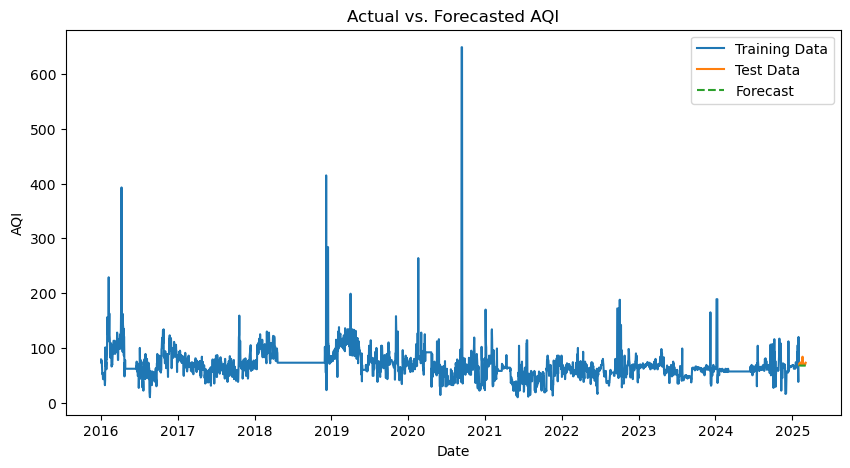

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Load the data from CSV and prepare the datetime index

df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# 2. Define the test size (e.g., last 30 days as test set)
test_size = 30
train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

# 3. Fit an ARIMA model on the training data for 'AQI'
# The order (1,1,1) is used as an example; you might need to tune it for your data.
model = ARIMA(train['AQI'], order=(1, 1, 1))
model_fit = model.fit()

# 4. Forecast the AQI for the test period (number of days equal to test_size)
forecast = model_fit.forecast(steps=test_size)

# 5. Evaluate the model
mae = mean_absolute_error(test['AQI'], forecast)
mse = mean_squared_error(test['AQI'], forecast)
rmse = np.sqrt(mse)

print("Evaluation Metrics for AQI Forecast:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot actual vs. forecasted AQI values
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['AQI'], label="Training Data")
plt.plot(test.index, test['AQI'], label="Test Data")
plt.plot(test.index, forecast, label="Forecast", linestyle="--")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("Actual vs. Forecasted AQI")
plt.legend()
plt.show()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.metrics import mae, rmse, mape

# 1. Load the data from CSV and prepare the datetime index

df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.sort_values('date', inplace=True)

# 2. Create a Darts TimeSeries from the dataframe using the 'date' column as time and 'AQI' as value
ts = TimeSeries.from_dataframe(df, time_col='date', value_cols='AQI')

# 3. Split the time series into training and testing sets (last 30 days as test set)
test_size = 30
train, test = ts[:-test_size], ts[-test_size:]

# 4. Define and fit the N‑BEATS model.
#    Here we use an input chunk of 30 days and forecast an output chunk of 30 days.
model = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=30,
    n_epochs=100,
    random_state=42,
    verbose=True
)
model.fit(train, verbose=True)

# 5. Forecast for the next 30 days (the same as test_size)
forecast = model.predict(test_size)

# 6. Evaluate the forecast using common metrics.
error_mae = mae(test, forecast)
error_rmse = rmse(test, forecast)
error_mape = mape(test, forecast)

print("Evaluation Metrics for N‑BEATS AQI Forecast:")
print(f"MAE: {error_mae:.2f}")
print(f"RMSE: {error_rmse:.2f}")
print(f"MAPE: {error_mape:.2f}%")

# 7. Plot the training data, test data, and the forecast.
plt.figure(figsize=(10, 5))
train.plot(label="Train")
test.plot(label="Test")
forecast.plot(label="Forecast", lw=2, ls="--")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI Forecast using N‑BEATS Model")
plt.legend()
plt.show()

ImportError: cannot import name '_fit_context' from 'sklearn.base' (c:\Users\hasib\anaconda3\Lib\site-packages\sklearn\base.py)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# 1. Load the data and prepare the datetime index

df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.sort_values('date', inplace=True)

# 2. Extract the AQI column and scale the values
aqi_data = df['AQI'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_data)

# 3. Create sequences using a sliding window approach
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30  # Use the past 30 days to predict the next day
X, y = create_sequences(aqi_scaled, window_size)

# 4. Split the data into training and test sets (using the last 30 days for testing)
test_size = 30
X_train, y_train = X[:-test_size], y[:-test_size]
X_test, y_test = X[-test_size:], y[-test_size:]

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# 5. Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 6. Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# 7. Forecast on the test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test)

# 8. Evaluate the model
mae_val = mean_absolute_error(y_test_inv, y_pred)
mse_val = mean_squared_error(y_test_inv, y_pred)
rmse_val = math.sqrt(mse_val)

print("\nEvaluation Metrics for LSTM AQI Forecast:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")

# 9. Plot the actual vs. predicted AQI values for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, marker='o', label="Actual AQI")
plt.plot(y_pred, marker='o', label="Predicted AQI")
plt.xlabel("Time step (Test Samples)")
plt.ylabel("AQI")
plt.title("LSTM AQI Forecast")
plt.legend()
plt.show()


ValueError: 'date' is both an index level and a column label, which is ambiguous.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.metrics import mae, rmse, mape

# 1. Load the CSV and create a datetime column

df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.sort_values('date', inplace=True)

# 2. Create a Darts TimeSeries from the DataFrame using the 'date' column
ts = TimeSeries.from_dataframe(df, time_col='date', value_cols='AQI')

# 3. Split into train and test sets (last 30 days for testing)
test_size = 30
train, test = ts[:-test_size], ts[-test_size:]

# 4. Define and fit the N‑BEATS model
model = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=30,
    n_epochs=100,
    random_state=42,
    verbose=True
)
model.fit(train, verbose=True)

# 5. Forecast for the test period
forecast = model.predict(test_size)

# 6. Evaluate the forecast
error_mae = mae(test, forecast)
error_rmse = rmse(test, forecast)
error_mape = mape(test, forecast)

print("Evaluation Metrics for N‑BEATS AQI Forecast:")
print(f"MAE: {error_mae:.2f}")
print(f"RMSE: {error_rmse:.2f}")
print(f"MAPE: {error_mape:.2f}%")

# 7. Plot the results
plt.figure(figsize=(10, 5))
train.plot(label="Train")
test.plot(label="Test")
forecast.plot(label="Forecast", lw=2, ls="--")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI Forecast using N‑BEATS Model")
plt.legend()
plt.show()


ImportError: cannot import name '_fit_context' from 'sklearn.base' (c:\Users\hasib\anaconda3\Lib\site-packages\sklearn\base.py)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# 1. Load the data and create a datetime column (keep it as a column)

df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.sort_values('date', inplace=True)

# 2. Extract the AQI column and scale the values
aqi_data = df['AQI'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_data)

# 3. Create sequences using a sliding window approach
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30  # Use the past 30 days to predict the next day
X, y = create_sequences(aqi_scaled, window_size)

# 4. Split the data into training and test sets (using the last 30 samples for testing)
test_size = 30
X_train, y_train = X[:-test_size], y[:-test_size]
X_test, y_test = X[-test_size:], y[-test_size:]

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# 5. Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 6. Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# 7. Forecast on the test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test)

# 8. Evaluate the model
mae_val = mean_absolute_error(y_test_inv, y_pred)
mse_val = mean_squared_error(y_test_inv, y_pred)
rmse_val = math.sqrt(mse_val)

print("\nEvaluation Metrics for LSTM AQI Forecast:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")

# 9. Plot the actual vs. predicted AQI values for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, marker='o', label="Actual AQI")
plt.plot(y_pred, marker='o', label="Predicted AQI")
plt.xlabel("Time step (Test Samples)")
plt.ylabel("AQI")
plt.title("LSTM AQI Forecast")
plt.legend()
plt.show()


ValueError: 'date' is both an index level and a column label, which is ambiguous.

Training set shape: (2666, 30, 1)
Test set shape: (30, 30, 1)


c:\Users\hasib\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0034 - val_loss: 4.5170e-04
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0014 - val_loss: 4.6196e-04
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023 - val_loss: 4.4928e-04
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017 - val_loss: 4.7265e-04
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020 - val_loss: 4.5121e-04
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021 - val_loss: 4.5745e-04
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 4.6171e-04
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.9475e-04 - val_loss: 4.5217e-04
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020 - val_loss: 4.3114e-04
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0025 - val_loss: 5.0656e-04
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0018 - val_loss: 4.5434e-04

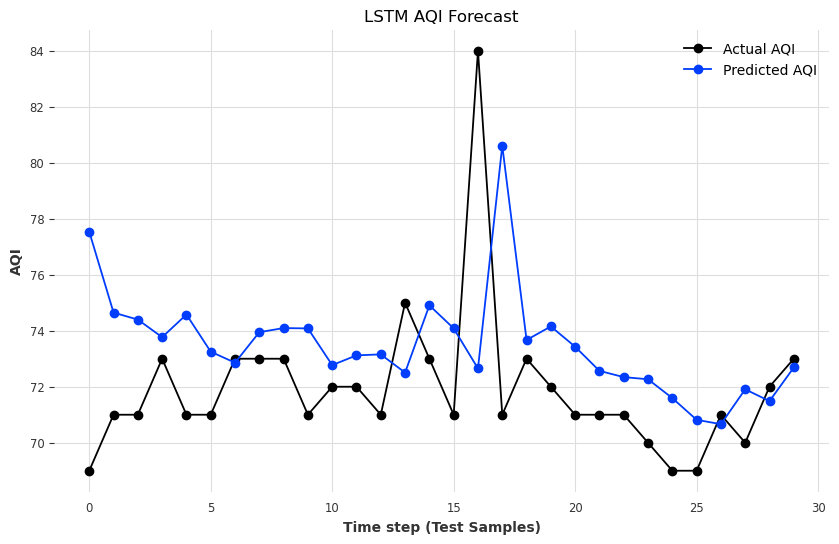

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# 1. Load the data and create a datetime column, then set it as the index
df = pd.read_csv("aqi.csv")
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.sort_values('date', inplace=True)
df.set_index('date', inplace=True)

# 2. Remove any duplicate 'date' column to avoid ambiguity
if 'date' in df.columns:
    df = df.drop(columns=['date'])

# 3. Extract the AQI column and scale the values
aqi_data = df['AQI'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_data)

# 4. Create sequences using a sliding window approach
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30  # Using the past 30 days to predict the next day
X, y = create_sequences(aqi_scaled, window_size)

# 5. Split the data into training and test sets (using the last 30 samples for testing)
test_size = 30
X_train, y_train = X[:-test_size], y[:-test_size]
X_test, y_test = X[-test_size:], y[-test_size:]

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# 6. Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 7. Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# 8. Forecast on the test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test)

# 9. Evaluate the model
mae_val = mean_absolute_error(y_test_inv, y_pred)
mse_val = mean_squared_error(y_test_inv, y_pred)
rmse_val = math.sqrt(mse_val)

print("\nEvaluation Metrics for LSTM AQI Forecast:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")

# 10. Plot the actual vs. predicted AQI values for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, marker='o', label="Actual AQI")
plt.plot(y_pred, marker='o', label="Predicted AQI")
plt.xlabel("Time step (Test Samples)")
plt.ylabel("AQI")
plt.title("LSTM AQI Forecast")
plt.legend()
plt.show()
